In [0]:
# IMPORTAMOS LIBS
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# INSTANCIAMOS O DATASET
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

5


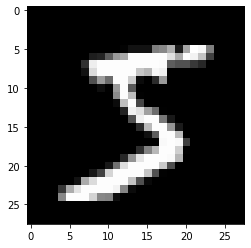

In [38]:
# VISUALIZAMOS 1 AMOSTRA
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [0]:
# RESHAPE
input_shape = [28, 28, 1]

X_train = tf.reshape(X_train, [X_train.shape[0]] + input_shape)
X_test = tf.reshape(X_test, [X_test.shape[0]] + input_shape)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [41]:
X_train

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  

In [0]:
X_train /= 255
X_test /= 255

In [0]:
def show_distribution(labels):
  # Convert tensor to a list.
  labels_list = list(labels)
  num_classes = len(set(labels_list))
  # Populate distribution list.
  distribution = [labels_list.count(i) for i in range(num_classes)]
  # Visualise.
  y_index = range(num_classes)
  plt.bar(y_index, distribution, align='center')
  plt.xticks(y_index, sorted(set(labels_list)))
  plt.ylabel('Frequency')
  plt.show()

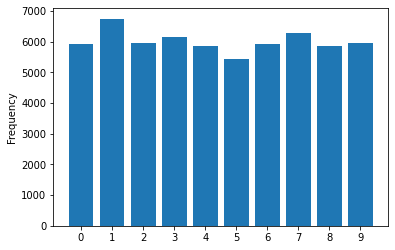

In [7]:
# Show distribution in order to determine metrics.
show_distribution(y_train)

In [0]:
# Reshape so labels can be onehot encoded.
y_train = tf.reshape(y_train, [-1, 1])
y_test = tf.reshape(y_test, [-1, 1])

In [0]:
from sklearn.preprocessing import OneHotEncoder

# Set sparse to False in order to return an array.
encoder = OneHotEncoder(sparse=False)

y_train = tf.convert_to_tensor(encoder.fit_transform(y_train))
y_test = tf.convert_to_tensor(encoder.fit_transform(y_test))

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    # Declare Layers Individually.
    self.conv = tf.keras.layers.Conv2D(28, kernel_size=(3, 3), input_shape=input_shape)
    self.max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.fc2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  def call(self, inputs):
    t = self.conv(inputs)
    t = self.max_pool(t)
    t = self.flatten(t)
    t = self.fc1(t)
    return self.fc2(t)

In [0]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [0]:
model = MNISTModel()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [13]:
h = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.5479 - accuracy: 0.9186 - val_loss: 1.5034 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4979 - accuracy: 0.9650 - val_loss: 1.4902 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.4864 - accuracy: 0.9758 - val_loss: 1.4896 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.4807 - accuracy: 0.9814 - val_loss: 1.4861 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4777 - accuracy: 0.9841 - val_loss: 1.4842 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4752 - accuracy: 0.9864 - val_loss: 1.4823 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.4740 - accuracy: 0.9877 - val_loss: 1.4780 -

In [21]:
model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 1.4699 - accuracy: 0.9914 - val_loss: 1.4804 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 1.4691 - accuracy: 0.9922 - val_loss: 1.4807 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.4685 - accuracy: 0.9928 - val_loss: 1.4794 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4684 - accuracy: 0.9928 - val_loss: 1.4795 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.4674 - accuracy: 0.9938 - val_loss: 1.4791 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.4671 - accuracy: 0.9942 - val_loss: 1.4793 - val_accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.4673 - accuracy: 0.9939 - val_loss: 1.4801 -

In [0]:
model.save_weights('mnist_model.h5')
#model.save('mnist_model', save_format='h5')

In [63]:
!ls /content/mnist_model.h5

drive  mnist_model  mnist_model.h5  sample_data


In [0]:
from google.colab import files
files.download('mnist_model.h5') 

In [65]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 104.6MB 93kB/s 
     |████████████████████████████████| 92kB 11.2MB/s 
     |████████████████████████████████| 256kB 39.6MB/s 
     |████████████████████████████████| 921kB 38.6MB/s 
     |████████████████████████████████| 3.9MB 42.4MB/s 
     |████████████████████████████████| 450kB 49.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ce6c6cee761756eb77e34e27edd59b24345e9a006a8efa944a18d01589bc8a7c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=b104d5728ff38c253e577b80587d5bacdc8b8ebee6118fb3a74255fdeb596820
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built gast PyInquirer
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, b

In [0]:
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
!tensorflowjs_converter --input_format keras \
                       /content/mnist_model.h5 \
                       /content/json

#### Referências: https://codelabs.developers.google.com/codelabs/tensorflowjs-teachablemachine-codelab/index.html#0